In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

### Problem 1

Loading the titanic sample dataset from the Seaborn library into Python using a Pandas dataframe and visualizing it.

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
type(titanic)

pandas.core.frame.DataFrame

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.shape

(891, 15)

In [8]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
titanic = titanic.dropna()

In [10]:
labelGroups = titanic[(titanic.survived == 1)].groupby(['sex'])

Text(0, 0.5, 'counts')

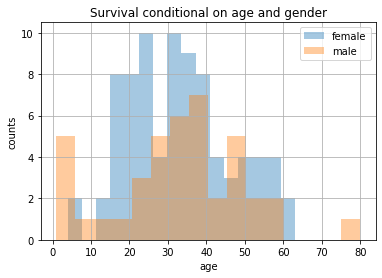

In [11]:
labelGroups['age'].hist(alpha=0.4, legend = True, bins = 16)
plt.title("Survival conditional on age and gender")
plt.xlabel("age")
plt.ylabel("counts")

The plot shows that overall more female passengers survived. If we take age into consideration as well, then we can notice that for children under 5 years old and for elders over 75 years old more males survived. For people in the range 11-63 years old more females survived. These results make sense, because in critical situations females and children are given priority and they were the first ones to occupy the life boats; there also weren't enough life boats for everyone, therefore people left behind, which were mostly male adults, had slimmer chances of survival.

### Problem 2

Loading the auto-mpg sample dataset.

In [12]:
auto_mpg = pd.read_csv("auto-mpg.data", delimiter=r"\s+")

In [13]:
type(auto_mpg)

pandas.core.frame.DataFrame

Adding the column names as columns and the first row of the dataset back after being deleted as a result of these transformations.

In [14]:
auto_mpg.columns = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name' ]

In [15]:
auto_mpg = auto_mpg.append(pd.Series(['18.0','8','307.0','130.0','3504.','12.0','70','1',"chevrolet chevelle malibu"], index = auto_mpg.columns), ignore_index=True)

In [16]:
auto_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
1,18,8,318,150.0,3436,11,70,1,plymouth satellite
2,16,8,304,150.0,3433,12,70,1,amc rebel sst
3,17,8,302,140.0,3449,10.5,70,1,ford torino
4,15,8,429,198.0,4341,10,70,1,ford galaxie 500


In [17]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           398 non-null    object
 1   cylinders     398 non-null    object
 2   displacement  398 non-null    object
 3   horsepower    398 non-null    object
 4   weight        398 non-null    object
 5   acceleration  398 non-null    object
 6   model_year    398 non-null    object
 7   origin        398 non-null    object
 8   car_name      398 non-null    object
dtypes: object(9)
memory usage: 28.1+ KB


Replacing '?' with a NaN from NumPy in columns 'horsepower', and calculating summary statistics for each numerical column.

In [18]:
#there are 0 rows with NaN values in 'horsepower' column
auto_mpg[auto_mpg['horsepower'].isna()].shape

(0, 9)

In [19]:
#there are 6 rows with '?' values in 'horsepower' column
auto_mpg[auto_mpg['horsepower'] == '?'].shape

(6, 9)

In [20]:
#Replacing '?' with a NaN from NumPy in columns 'horsepower'
imp = SimpleImputer(strategy = 'constant', fill_value=np.nan, missing_values='?')
imp = imp.fit(auto_mpg[['horsepower']])
auto_mpg['horsepower'] = imp.transform(auto_mpg[['horsepower']])

In [21]:
#there are 0 rows with '?' values in 'horsepower' column
auto_mpg[auto_mpg['horsepower'] == '?'].shape

(0, 9)

In [22]:
#there are 6 rows with NaN values in 'horsepower' column
auto_mpg[auto_mpg['horsepower'].isna()].shape

(6, 9)

Calculating summary statistics for each numerical column.

In [23]:
#because all columns are type object, I am casting them to numeric in order to calculate summary statistics
auto_mpg.dtypes

mpg             object
cylinders       object
displacement    object
horsepower      object
weight          object
acceleration    object
model_year      object
origin          object
car_name        object
dtype: object

In [24]:
cols = auto_mpg.columns.drop('car_name')
auto_mpg[cols] = auto_mpg[cols].apply(pd.to_numeric, errors='coerce')

In [25]:
#all columns besides 'car_name' are numerical type now
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [26]:
#calculating summary statistics
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Replacing the missing values with the overall mean, median, and mode and calculating the variance of the feature 'horsepower'.

In [27]:
#initial variance before transformations
auto_mpg['horsepower'].var()

1481.5693929745862

In [28]:
#variance with mean
imp_mean = SimpleImputer(strategy = 'mean', missing_values=np.nan)
imp_mean = imp_mean.fit(auto_mpg[['horsepower']])
imp_mean.transform(auto_mpg[['horsepower']]).var()

1455.5116398318123

In [29]:
#variance with median
imp_median = SimpleImputer(strategy = 'median', missing_values=np.nan)
imp_median = imp_median.fit(auto_mpg[['horsepower']])
imp_median.transform(auto_mpg[['horsepower']]).var()

1457.2982752960784

In [30]:
#variance with mode
imp_mode = SimpleImputer(strategy = 'most_frequent', missing_values=np.nan)
imp_mode = imp_mode.fit(auto_mpg[['horsepower']])
imp_mode.transform(auto_mpg[['horsepower']]).var()

1486.29231585061

*What imputation results in the lowest variance? Why? Is there a different method of imputing values that would match the distribution more accurately? Describe your method.*

The imputation with the mean results in the lowest variance. By replacing the NaN values with the mean we had extra 6 values equal to the mean in the dataset. Since **variance is the sum of the squared distances of each term in the distribution from the mean**, these extra 6 values that are equal to the mean added extra 6 zeroes in the sum of the variance (because mean - mean = 0)that was later divided by n+6. **In other words, given the definition for the variance, replacing NaN values with the mean reduced the average distance from the mean in a most effective way for all values of the feature compared to the mode and median.** Hence the lowest variance.

To match the distribution more accurately, imputation with machine learning models would produce one of the most accurate prediction of the missing data point. Imputation with mean, median or mode can be inaccurate and introduce bias, while ML can learn from the data set and based on the other features of the data points. it can make a good prediction for the missing values. 


### Problem 3

Loading the iris sample dataset into Python using a Pandas dataframe.

In [31]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
iris = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [32]:
iris.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Standardizing the Data.

In [33]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the columns
x = iris.loc[:, columns].values
# Separating out the target
y = iris.loc[:,['target']].values
# Standardizing the columns
x = StandardScaler().fit_transform(x)

In [34]:
#Dataframe x (for visualization purposes)
x_df = pd.DataFrame(data = x, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
x_df.head(5)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Performing a PCA using the Scikit Decomposition component, and providing the percentage of variance explained by each of the Principal Components.

In [35]:
pca = PCA(n_components=3) # Reducing the number of components to three.
principal_components = pca.fit_transform(x) #perform PCA
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
final_pca_iris = pd.concat([principal_df, iris[['target']]], axis = 1)

In [36]:
pca.get_covariance()

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [37]:
print("Percentage of variance explained by each component")
print(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print("\n\n","Amount of variance considered from each components")
print(pca.components_)

Percentage of variance explained by each component
[72.77 23.03  3.68]


 Amount of variance considered from each components
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]]


Text(0, 0.5, 'explained_variance_')

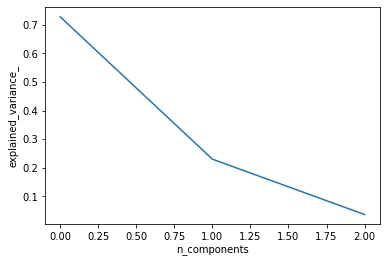

In [38]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

Comparing this to the percentage of variance explained by each of the original features.

In [39]:
print("Percentage of variance explained by each component")
print(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Percentage of variance explained by each component
[72.77 23.03  3.68]


In [40]:
print("Percentage of variance for standardized version of the original features")
np.round(x_df.var().to_numpy()/(x_df.var().to_numpy().sum()), decimals=4)*100

Percentage of variance for standardized version of the original features


array([25., 25., 25., 25.])

In [41]:
print("Percentage of variance for the original features")
np.round(iris.var().to_numpy()/(iris.var().to_numpy().sum()), decimals=4)*100

Percentage of variance for the original features


array([15.01,  4.11, 68.13, 12.75])

*What do you observe?*

For all features, percentage of variance explained by each of the original features is less than the biggest percentage of variance explained by principal components - principal component 1. While initially we needed all 4 features to avoid substantial informatiopn loss, principle components allowed us to reduce the number of features by one at the cost of 100% - 99.48% = 0.52% of information loss.

Citations:

[A One-Stop Shop for Principal Component Analysis](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

[PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

### Problem 4

Ploting a projection of each feature onto the 1st Principal Component from the above problem against vs. the original feature itself.

In [42]:
final_pca_iris.head(5)

,principal component 1,principal component 2,principal component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


In [43]:
x_df = pd.concat([x_df, iris[['target']]], axis = 1)
x_df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


Text(0.5, 1.0, 'PC 1 vs Sepal Length')

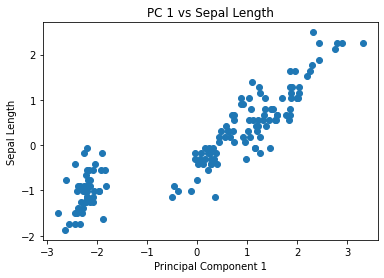

In [44]:
plt.scatter(final_pca_iris['principal component 1'], x_df['sepal length']);
plt.xlabel('Principal Component 1');
plt.ylabel('Sepal Length');
plt.title("PC 1 vs Sepal Length")

Text(0.5, 1.0, 'PC 1 vs Sepal Width')

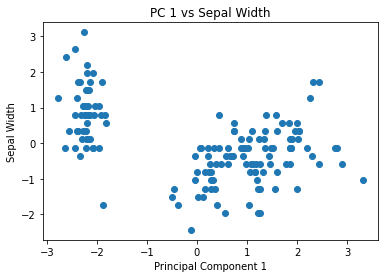

In [45]:
plt.scatter(final_pca_iris['principal component 1'], x_df['sepal width']);
plt.xlabel('Principal Component 1');
plt.ylabel('Sepal Width');
plt.title("PC 1 vs Sepal Width")

Text(0.5, 1.0, 'PC 1 vs Petal Length')

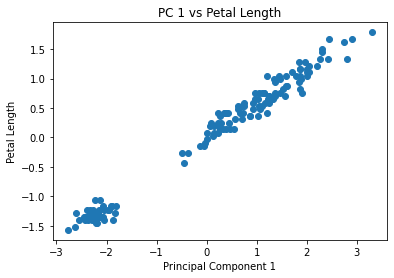

In [46]:
plt.scatter(final_pca_iris['principal component 1'], x_df['petal length']);
plt.xlabel('Principal Component 1');
plt.ylabel('Petal Length');
plt.title("PC 1 vs Petal Length")

Text(0.5, 1.0, 'PC 1 vs Petal Width')

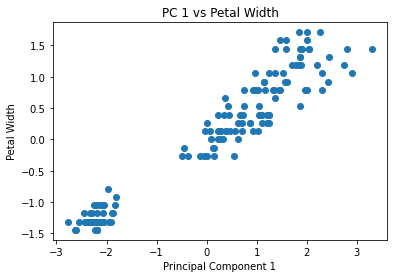

In [47]:
plt.scatter(final_pca_iris['principal component 1'], x_df['petal width']);
plt.xlabel('Principal Component 1');
plt.ylabel('Petal Width');
plt.title("PC 1 vs Petal Width")

Calculating cosine similarity between principle component 1 and original features.+

In [48]:
#cosine similarity between principal component 1 and petal length
cosine_similarity(final_pca_iris['principal component 1'].to_numpy().reshape(1,-1), x_df['petal length'].to_numpy().reshape(1,-1))[0][0]

0.9916844215984975

In [49]:
#cosine similarity between principal component 1 and petal width
cosine_similarity(final_pca_iris['principal component 1'].to_numpy().reshape(1,-1), x_df['petal width'].to_numpy().reshape(1,-1))[0][0]

0.9649957874713762

In [50]:
#cosine similarity between principal component 1 and sepal length
cosine_similarity(final_pca_iris['principal component 1'].to_numpy().reshape(1,-1), x_df['sepal length'].to_numpy().reshape(1,-1))[0][0]

0.8912244788933582

In [51]:
#cosine similarity between principal component 1 and sepal width
cosine_similarity(final_pca_iris['principal component 1'].to_numpy().reshape(1,-1), x_df['sepal width'].to_numpy().reshape(1,-1))[0][0]

-0.4493129756580255

In [52]:
#cosine similarity between petal length and petal width
cosine_similarity(x_df['petal length'].to_numpy().reshape(1,-1), x_df['petal width'].to_numpy().reshape(1,-1))[0][0]

0.9627570970509661

*Which pair of features show a closer relationship to PC1 vs. the others?*

Judging by the cosine similarity, petal length and width show the closest relationship to the principal component 1, since the cosine similarities between them and principal component 1 are 0.99 and 0.96 respectively (both very close to 1). In addition, the cosine similarity between petal length and petal width is 0.96 - significant similarity.

Calculating the correlation coefficient between petal length and petal width and their projections onto PC1.

In [53]:
pc_x = pd.concat([x_df, final_pca_iris[['principal component 1']]], axis = 1) 
pearson_corr = pc_x.corr(method='pearson')

In [54]:
pearson_corr

,sepal length,sepal width,petal length,petal width,principal component 1
sepal length,1.000000,-0.109369,0.871754,0.817954,0.891224
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.449313
petal length,0.871754,-0.420516,1.000000,0.962757,0.991684
petal width,0.817954,-0.356544,0.962757,1.000000,0.964996
principal component 1,0.891224,-0.449313,0.991684,0.964996,1.000000


*Do the result agree with the visual inspection?*

Yes, the results agree with the visual inspection, given that the correlation coefficients between petal length and width with their projections on principal component 1 are 0.99 and 0.96 respectively.

### Problem 5

Calculating the total variance of the original features and the total variance of the four eigenvectors from the above problem.

In [55]:
#total variance for standardized iris dataset
np.sum(x_df.var())

4.026845637583893

In [56]:
#total variance for the original iris dataset
np.sum(iris.var())

4.5692912751677826

In [57]:
#calculating 4 eigenvectors
pca_4 = PCA(n_components=4)
principal_components_4 = pca_4.fit_transform(x) #perform PCA
pc4_df = pd.DataFrame(data = principal_components_4
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [58]:
#calculating the total variance of the 4 eigenvectors
np.sum(pc4_df.var())

4.02684563758389

*What can you say about the corresponding values?*

Given that PCA was calculated using the standardized version of the iris dataset, it makes sense that the total variance for the standardized dataset is equal to the total variance for the 4 eigenvectors. Let's think of variance as amount of information; in that case the 4 eigenvectors conserve the amount of information in the original features, and it makes sense because the number of eigenvectors is equal to the number of original features, hence no amount of information was subject to being lost.

*If we wished to capture > 95% of the variance of the original data, how many principal components would we be selecting?*


In [59]:
#calculating the percentage of variance explained by each feature
pc4_df.var()*100/np.sum(pc4_df.var())

principal component 1    72.770452
principal component 2    23.030523
principal component 3     3.683832
principal component 4     0.515193
dtype: float64

In [60]:
#calculating the sum of the precentage of variance explained by the first and second principal components
72.770452 + 23.030523

95.80097500000001

If we wished to capture > 95% of the variance of the original data, we would be selecting first 2 principal components, since the sum of the percentage of the variance explained by the first and second principle components is 95.8%.

*How does this number correspond to the number of dimensions we are reducing our features to?*

By selecting 2 principle components, we are reducing our dimensionality to 2.